### 100,000 UK Used Car Data set
https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes


1. Выбрать набор данных для своей группы: <br>
    3530203_70301: Mercedes<br>
    3530203_70302: Ford <br>
    3530903_70101: BMW <br>
    3530903_70102: Audi <br>
    
2. Разбить данные на тренировочные и тестовые (70% на 30%, random_state=10).
3. Применить доступные способы предобработки данных.
4. Попытаться обучить регрессию для предсказания цены автомобиля c наилучшим качеством. Качество оценивать по метрике RMSE на тестовой подвыборке. Попробовать различные модели регуляризации (и не только).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
auto_data = pd.read_csv("bmw.csv")
auto_data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


## Data preprocessing

In [5]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


Нет null значений

In [6]:
auto_data.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


* `year` -- реалистично
* `price=1200` -- неправдоподобно
* `price=123456` -- надо проверить
* `mpg=470.8` -- вероятно выброс (кол-во миль на галон)
* `mileage=1` -- реалистичный пробег, машина с завода
* `tax=0` -- наверное, корректное значение
* `engineSize=0` -- пустое значение
* `engineSize=6.6` -- реалистично, проверили, есть, например, у BMW 7-series

In [3]:
zero_engine = auto_data[auto_data['engineSize'] == 0]
len(zero_engine)

47

In [4]:
auto_data.drop(zero_engine.index, inplace=True)

In [5]:
max_engine = auto_data[auto_data['engineSize'] == 6.6]
max_engine

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
9585,7 Series,2017,52950,Automatic,22000,Petrol,150,22.1,6.6
9799,7 Series,2017,57000,Automatic,11297,Petrol,145,22.1,6.6


Все хорошо, у этой модели есть такой модели есть такой объем двигателя

In [6]:
auto_data_max_price = auto_data[auto_data['price'] > 80000.0]
auto_data_max_price

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
721,8 Series,2019,84898,Semi-Auto,3185,Petrol,145,24.4,4.4
1813,8 Series,2019,88980,Semi-Auto,88,Petrol,145,24.4,4.4
2909,M4,2017,89990,Semi-Auto,1336,Petrol,145,33.2,3.0
3638,2 Series,2015,123456,Semi-Auto,33419,Diesel,20,68.9,2.0
4776,M5,2019,89900,Semi-Auto,2269,Petrol,145,24.1,4.4
5362,M4,2016,99950,Automatic,771,Petrol,300,33.2,3.0
5877,M5,2019,81140,Semi-Auto,551,Petrol,145,24.1,4.4


123456 - это **выброс** исходя из ее характеристик

In [7]:
auto_data_price = auto_data[auto_data['price'] == 123456.0]
auto_data.drop(auto_data_price.index, inplace=True)

In [8]:
auto_data_min_price = auto_data[auto_data['price'] == 1200.0]
auto_data_min_price

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
9744,3 Series,1999,1200,Automatic,82000,Petrol,245,31.0,2.8


Исходя из характеристик, считаем, что цена оправдана

In [9]:
auto_data_mpg = auto_data[auto_data['mpg'] > 400.0]
auto_data_mpg

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
32,i3,2016,17100,Automatic,25269,Other,0,470.8,0.6
8188,i3,2015,14940,Automatic,59000,Other,0,470.8,0.6
8620,i3,2017,19300,Automatic,32867,Other,0,470.8,0.6
8835,i3,2015,17400,Automatic,29465,Electric,0,470.8,1.0
10080,i3,2017,20000,Automatic,19178,Other,0,470.8,0.6
10086,i3,2017,19500,Automatic,23956,Other,135,470.8,0.6
10325,i3,2016,17000,Automatic,41063,Other,0,470.8,0.6
10530,i3,2017,17600,Automatic,50867,Other,135,470.8,0.6


Проверено, все сходится https://www.honestjohn.co.uk/realmpg/bmw/i3-2013

<AxesSubplot:>

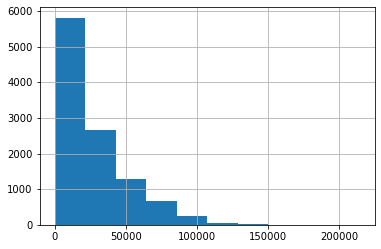

In [10]:
auto_data.mileage.hist()

Распределение выглядит реалистично

In [11]:
auto_data.describe()

,year,price,mileage,tax,mpg,engineSize
count,10733.000000,10733.000000,10733.000000,10733.000000,10733.000000,10733.000000
mean,2017.083388,22742.889313,25482.101556,131.996646,55.040622,2.177276
std,2.347757,11392.304903,25176.765334,61.133010,20.598474,0.534279
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.600000
25%,2016.000000,14950.000000,5500.000000,135.000000,45.600000,2.000000
50%,2017.000000,20490.000000,18271.000000,145.000000,53.300000,2.000000
75%,2019.000000,27950.000000,38231.000000,145.000000,62.800000,2.000000
max,2020.000000,99950.000000,214000.000000,580.000000,470.800000,6.600000


In [12]:
fueltype_counts = auto_data.fuelType.value_counts()
fueltype_counts

Diesel      7017
Petrol      3414
Hybrid       265
Other         36
Electric       1
Name: fuelType, dtype: int64

C:\ProgramData\Anaconda3\envs\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuelType', ylabel='count'>

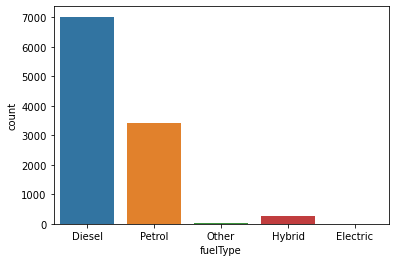

In [13]:
sns.countplot(auto_data.fuelType)

In [82]:
hybrids = auto_data[auto_data.fuelType == 'Hybrid']
set(hybrids.model)

{' 2 Series', ' 3 Series', ' 5 Series', ' 7 Series', ' X3', ' X5', ' i8'}

Да, они действительно бывают гибридными

In [14]:
other = auto_data[auto_data.fuelType == 'Other']
set(other.model)

{' 2 Series', ' 3 Series', ' 5 Series', ' X5', ' i3', ' i8'}

## Линейная регрессия

### LinearRegression()

In [77]:

auto_data_copy = auto_data.copy()

auto_data_dummy = pd.concat([auto_data_copy.drop("model", axis=1),
                             pd.get_dummies(auto_data_copy["model"])], axis = 1)
auto_data_dummy = pd.concat([auto_data_dummy.drop("transmission", axis=1),
                             pd.get_dummies(auto_data_dummy["transmission"])], axis = 1)
auto_data_dummy = pd.concat([auto_data_dummy.drop("fuelType", axis=1),
                             pd.get_dummies(auto_data_dummy["fuelType"])], axis = 1)
auto_data_dummy.head()


,year,price,mileage,tax,mpg,engineSize,1 Series,2 Series,3 Series,4 Series,...,i3,i8,Automatic,Manual,Semi-Auto,Diesel,Electric,Hybrid,Other,Petrol
0,2014,11200,67068,125,57.6,2.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,2018,27000,14827,145,42.8,2.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,2016,16000,62794,160,51.4,3.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,2017,12750,26676,145,72.4,1.5,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,2014,14500,39554,160,50.4,3.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [78]:
auto_data_dummy_without_price = auto_data_dummy.drop(['price'], axis=1)

In [79]:
X, Y = auto_data_dummy_without_price, auto_data_dummy['price']

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [81]:
std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

X_train_scaled

array([[ 0.8235433 , -0.83949831,  0.21680382, ..., -0.16151089,
        -0.05778127,  1.46632357],
       [-1.30048032,  1.23106706, -0.10997863, ..., -0.16151089,
        -0.05778127, -0.68197771],
       [ 1.24834803, -0.74200576,  0.21680382, ..., -0.16151089,
        -0.05778127, -0.68197771],
       ...,
       [ 1.24834803, -0.93368469,  0.21680382, ..., -0.16151089,
        -0.05778127, -0.68197771],
       [ 1.24834803, -0.97304381,  0.21680382, ..., -0.16151089,
        -0.05778127, -0.68197771],
       [-0.02606615, -0.24899339,  0.46189066, ..., -0.16151089,
        -0.05778127,  1.46632357]])

In [82]:
simple_LR = LinearRegression()

simple_LR.fit(X_train_scaled, Y_train)
simple_LR_predictions = simple_LR.predict(X_test_scaled)

simple_LR_MSE = metrics.mean_squared_error(Y_test, simple_LR_predictions)

print (f'MSE = {round(simple_LR_MSE,3)}')

MSE = 15061492.931


In [83]:
simple_LR_RMSE = metrics.mean_squared_error(Y_test, simple_LR_predictions, squared = False)

print (f'RMSE = {round(simple_LR_RMSE,3)}')

RMSE = 3880.914


In [84]:
print (f'Test std: {round(Y_test.std(),3)}')

Test std: 11338.271


Text(0, 0.5, 'Target')

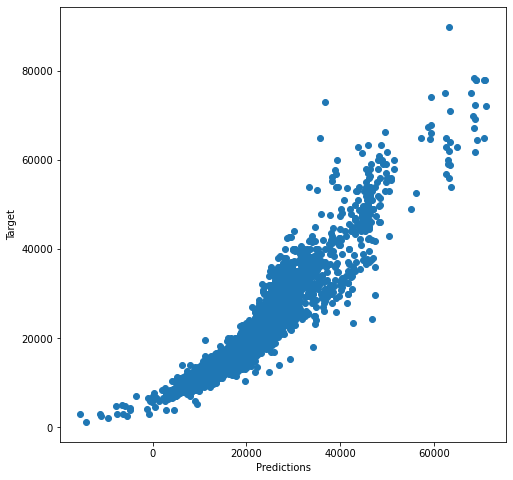

In [85]:
plt.figure(figsize=(8, 8))
plt.scatter(simple_LR_predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

In [57]:
simple_LR.intercept_, simple_LR.coef_

(22644.287755897483,
 array([ 4.23020481e+03, -2.83729033e+03, -6.39596899e+02, -2.63562002e+03,
         1.99143731e+03,  1.26577057e+15,  1.05720414e+15,  1.38204246e+15,
         9.45581023e+14,  9.70500742e+14,  3.30625839e+14,  3.26347626e+14,
         2.07023782e+14,  1.46534567e+14,  1.46534567e+14,  3.43127236e+14,
         1.69147118e+14,  1.00155554e+14,  8.63601803e+14,  5.25849541e+14,
         7.30020851e+14,  4.21542203e+14,  6.58932656e+14,  3.19818542e+14,
         2.41842208e+14,  7.57256110e+13,  3.24186464e+14,  9.27322018e+13,
         1.13550593e+14,  4.54514993e+15,  4.08490705e+15,  4.76840247e+15,
        -2.35900713e+13, -5.71963652e+11, -7.80408852e+12, -2.85524621e+12,
        -2.30785671e+13]))

In [58]:
pd.DataFrame(simple_LR.coef_, auto_data_dummy_without_price.columns, columns=['Coefficients'])

,Coefficients
year,4.230205e+03
mileage,-2.837290e+03
tax,-6.395969e+02
mpg,-2.635620e+03
engineSize,1.991437e+03
1 Series,1.265771e+15
2 Series,1.057204e+15
3 Series,1.382042e+15
4 Series,9.455810e+14
5 Series,9.705007e+14


### Lasso()

In [59]:
model = Lasso()

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(simple_LR.coef_,  auto_data_dummy_without_price.columns, columns=['Coefficients'])

RMSE = 3882.075


,Coefficients
year,4.230205e+03
mileage,-2.837290e+03
tax,-6.395969e+02
mpg,-2.635620e+03
engineSize,1.991437e+03
1 Series,1.265771e+15
2 Series,1.057204e+15
3 Series,1.382042e+15
4 Series,9.455810e+14
5 Series,9.705007e+14


### LassoCV()

In [60]:
model = LassoCV()

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(simple_LR.coef_,  auto_data_dummy_without_price.columns, columns=['Coefficients'])

RMSE = 3882.286


,Coefficients
year,4.230205e+03
mileage,-2.837290e+03
tax,-6.395969e+02
mpg,-2.635620e+03
engineSize,1.991437e+03
1 Series,1.265771e+15
2 Series,1.057204e+15
3 Series,1.382042e+15
4 Series,9.455810e+14
5 Series,9.705007e+14


### LassoCV() with alphas

In [61]:
alphas = np.linspace(1, 10, 20)
alphas

array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])

In [62]:
model = LassoCV(random_state = 10, alphas=alphas)

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(simple_LR.coef_,  auto_data_dummy_without_price.columns, columns=['Coefficients'])

RMSE = 3882.075


,Coefficients
year,4.230205e+03
mileage,-2.837290e+03
tax,-6.395969e+02
mpg,-2.635620e+03
engineSize,1.991437e+03
1 Series,1.265771e+15
2 Series,1.057204e+15
3 Series,1.382042e+15
4 Series,9.455810e+14
5 Series,9.705007e+14


### Ridge()

In [63]:
model = Ridge()

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(simple_LR.coef_,  auto_data_dummy_without_price.columns, columns=['Coefficients'])

RMSE = 3882.089


,Coefficients
year,4.230205e+03
mileage,-2.837290e+03
tax,-6.395969e+02
mpg,-2.635620e+03
engineSize,1.991437e+03
1 Series,1.265771e+15
2 Series,1.057204e+15
3 Series,1.382042e+15
4 Series,9.455810e+14
5 Series,9.705007e+14


### RidgeCV()

In [64]:
model = RidgeCV()

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(simple_LR.coef_,  auto_data_dummy_without_price.columns, columns=['Coefficients'])

RMSE = 3882.235


,Coefficients
year,4.230205e+03
mileage,-2.837290e+03
tax,-6.395969e+02
mpg,-2.635620e+03
engineSize,1.991437e+03
1 Series,1.265771e+15
2 Series,1.057204e+15
3 Series,1.382042e+15
4 Series,9.455810e+14
5 Series,9.705007e+14


### RandomForestRegressor

In [86]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 10, n_estimators = 100)

model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(model.feature_importances_, auto_data_dummy_without_price.columns,
             columns=['Importance']).sort_values('Importance')

RMSE = 2488.316


,Importance
Z3,9.790872e-07
Electric,1.633917e-06
i3,6.129128e-06
Other,2.100620e-05
M2,2.664232e-05
M6,8.813528e-05
M3,1.068184e-04
Z4,3.645972e-04
M4,5.432295e-04
M5,6.465577e-04


Text(0, 0.5, 'Target')

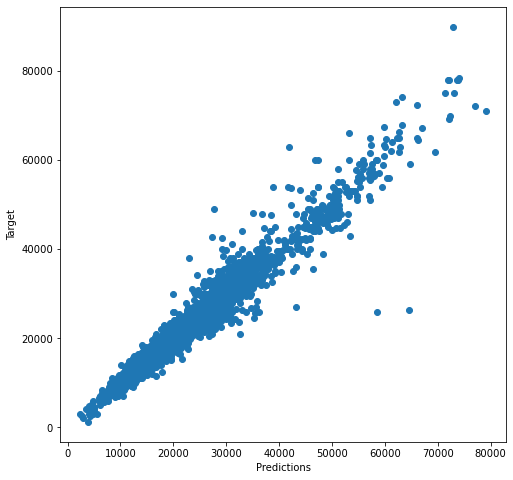

In [87]:
plt.figure(figsize=(8, 8))
plt.scatter(predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')